In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2 as cv

In [4]:
a = np.zeros([2,3])
a

array([[0., 0., 0.],
       [0., 0., 0.]])

In [109]:
def filter(img, kernel):
    image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    padding_image = np.zeros([image.shape[0] + kernel.shape[0]-1,image.shape[1] + kernel.shape[0]-1])
    padding_image[int((kernel.shape[0]-1)/2):int(-((kernel.shape[0]-1)/2)),int((kernel.shape[0]-1)/2):int(-((kernel.shape[0]-1)/2))] = image
    arr = np.array([])
    for j in range(padding_image.shape[0]):
        if ((j+kernel.shape[0]) > padding_image.shape[0]):
            break
        else:
            
            for k in range(padding_image.shape[1]):
                if ((k+kernel.shape[0]) > padding_image.shape[1]):
                    break
                else:
                   

                    mult = np.multiply(padding_image[j:j+kernel.shape[0],k:k+kernel.shape[0]],kernel)
                    s = np.sum(mult)
                    arr = np.append(arr, s)
    
    new_img = arr.reshape(padding_image.shape[0]-kernel.shape[0]+1,padding_image.shape[1]-kernel.shape[0]+1)
    return (new_img)

In [110]:
img = cv.imread('img1.png')
Laplacian_kernel = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])


In [111]:
Laplacian_img = filter(img, Laplacian_kernel)

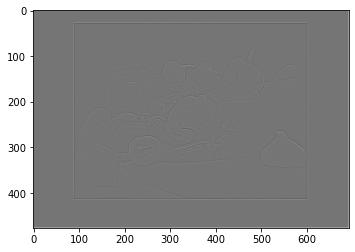

In [112]:
plt.imshow(Laplacian_img, cmap = 'gray')
plt.show()

In [90]:
Laplacian_img= cv.imwrite('Laplacian_edge1.jpg', Laplacian_img )

In [91]:
blur_kernel = 1/9 * np.ones([3,3])

In [92]:
blur_img = filter(img,blur_kernel)

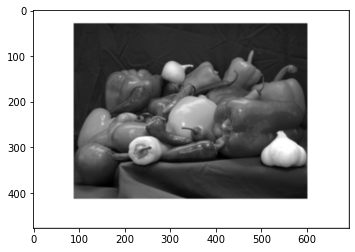

In [95]:
plt.imshow(blur_img, cmap = 'gray')
plt.show()

In [96]:
blur_img = cv.imwrite('blur.jpg', blur_img )

In [97]:
Gaussian_blur_kernel = np.ones([[1/16,1/8,1/16],[1/8,1/4,1/8],[1/16,1/8,1/16]])

In [98]:
Gaussian_blur_img = filter(img,Gaussian_blur_kernel)

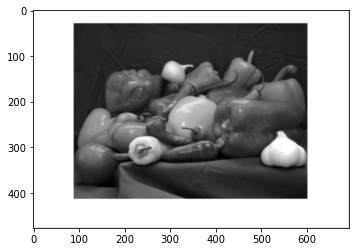

In [99]:
plt.imshow(Gaussian_blur_img, cmap = 'gray')
plt.show()

In [103]:
Gaussian_blur_img = cv.imwrite('Gaussian_blur.jpg', Gaussian_blur_img )

In [104]:
sharp_kernel =  np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])

In [105]:
sharp_img = filter(img,sharp_kernel)

In [107]:
sharp_img = cv.imwrite('sharp.jpg', sharp_img )